# EDA Assignment

Ques-1 Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
    (Show the shape and column names as well).

In [10]:
import pandas as pd


file_path = "/Users/padamraj/Downloads/BIKE DETAILS.csv"   
bike_df = pd.read_csv(file_path)


print("First 10 rows of the dataset:\n")
print(bike_df.head(10))


print("\nShape of dataset:", bike_df.shape)


print("\nColumn names:", bike_df.columns.tolist())


First 10 rows of the dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

Ques-2 Check for missing values in all columns and describe your approach for handling them.

In [9]:
import pandas as pd


file_path = "/Users/padamraj/Downloads/BIKE DETAILS.csv" 
df = pd.read_csv(file_path)


missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Values": missing_counts,
    "Percentage": missing_pct.round(2)
})

print("Missing Value Summary:\n")
print(missing_summary)




print("\nHandling Approach:")
for col in df.columns:
    if missing_counts[col] == 0:
        print(f"- {col}: No missing values → No action needed.")
    else:
        print(f"- {col}: {missing_counts[col]} missing values ({missing_pct[col]:.2f}%).")
        if df[col].dtype in ['int64', 'float64']:
            print("  Suggested: Impute using median (or group-based median) "
                  "OR drop column if too high.")
        else:
            print("  Suggested: Fill with mode/most frequent value OR treat as 'Unknown'.")


Missing Value Summary:

                   Missing Values  Percentage
name                            0         0.0
selling_price                   0         0.0
year                            0         0.0
seller_type                     0         0.0
owner                           0         0.0
km_driven                       0         0.0
ex_showroom_price             435        41.0

Handling Approach:
- name: No missing values → No action needed.
- selling_price: No missing values → No action needed.
- year: No missing values → No action needed.
- seller_type: No missing values → No action needed.
- owner: No missing values → No action needed.
- km_driven: No missing values → No action needed.
- ex_showroom_price: 435 missing values (41.00%).
  Suggested: Impute using median (or group-based median) OR drop column if too high.


Ques-3 Plot the distribution of selling prices using a histogram and describe the oveall trend.

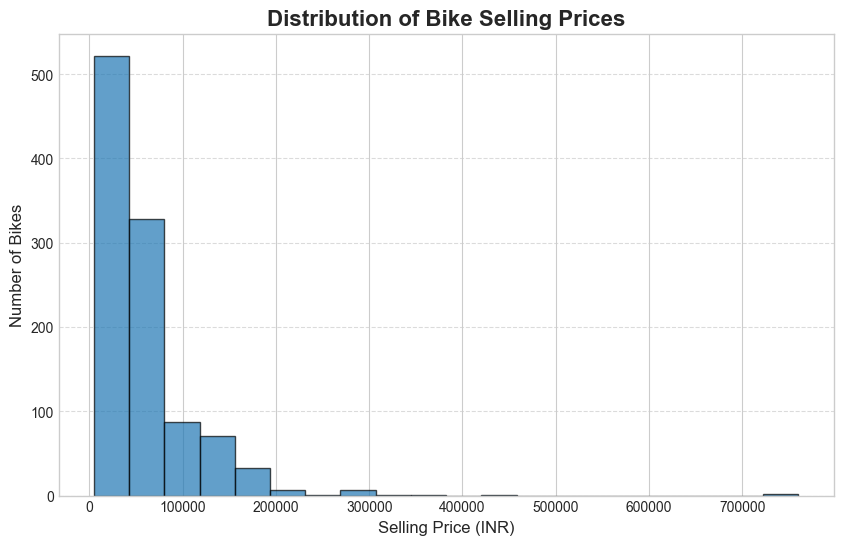


--- Analysis of the Selling Price Distribution ---
The histogram shows that the selling prices are not evenly distributed.
The distribution is right-skewed, meaning a large number of bikes are sold at lower prices.
There is a long tail extending to the right, indicating a smaller number of expensive bikes.


In [7]:

import pandas as pd
import matplotlib.pyplot as plt


file_name = "/Users/padamraj/Downloads/BIKE DETAILS.csv"

try:
    
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please make sure it's in the same directory as this script.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()


plt.style.use('seaborn-v0_8-whitegrid')


plt.figure(figsize=(10, 6))


df['selling_price'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)


plt.title('Distribution of Bike Selling Prices', fontsize=16, fontweight='bold')
plt.xlabel('Selling Price (INR)', fontsize=12)
plt.ylabel('Number of Bikes', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


print("\n--- Analysis of the Selling Price Distribution ---")
print("The histogram shows that the selling prices are not evenly distributed.")
print("The distribution is right-skewed, meaning a large number of bikes are sold at lower prices.")
print("There is a long tail extending to the right, indicating a smaller number of expensive bikes.")


Ques-4 Create a bar plot to visualize the average selling price for each seller_type and write one observation.

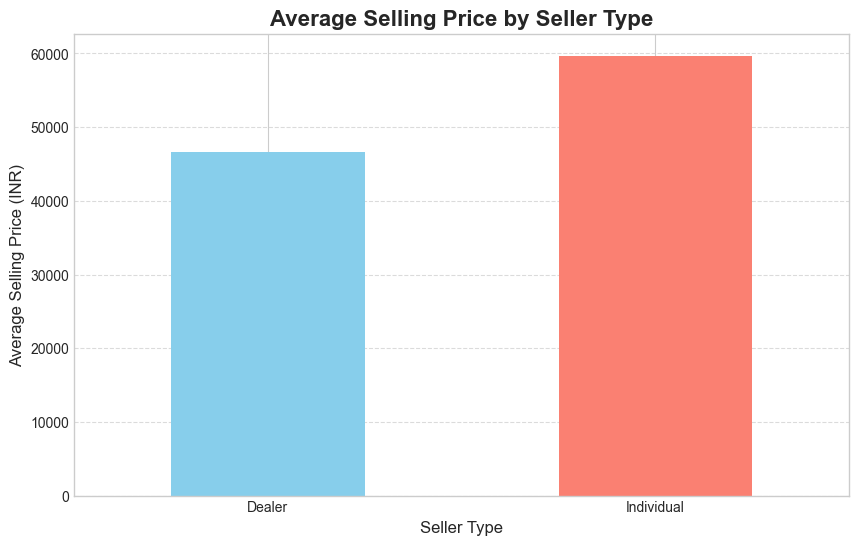


--- Analysis of Average Selling Prices by Seller Type ---
The bar plot shows the average selling price for each type of seller.
Observation: The average selling price for bikes sold by 'Dealers' is significantly higher than for bikes sold by 'Individuals'.


In [8]:

import pandas as pd
import matplotlib.pyplot as plt

file_name = "/Users/padamraj/Downloads/BIKE DETAILS.csv"


try:
    
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please make sure it's in the same directory as this script.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()


plt.style.use('seaborn-v0_8-whitegrid')


average_prices = df.groupby('seller_type')['selling_price'].mean()


plt.figure(figsize=(10, 6))


average_prices.plot(kind='bar', color=['skyblue', 'salmon'])


plt.title('Average Selling Price by Seller Type', fontsize=16, fontweight='bold')
plt.xlabel('Seller Type', fontsize=12)
plt.ylabel('Average Selling Price (INR)', fontsize=12)


plt.xticks(rotation=0)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

print("\n--- Analysis of Average Selling Prices by Seller Type ---")
print("The bar plot shows the average selling price for each type of seller.")
print("Observation: The average selling price for bikes sold by 'Dealers' is significantly higher than for bikes sold by 'Individuals'.")


Ques-5 Compute the average km_driven for each ownership type(1st owner, 2nd owner, etc), and present the result as a bar plot.

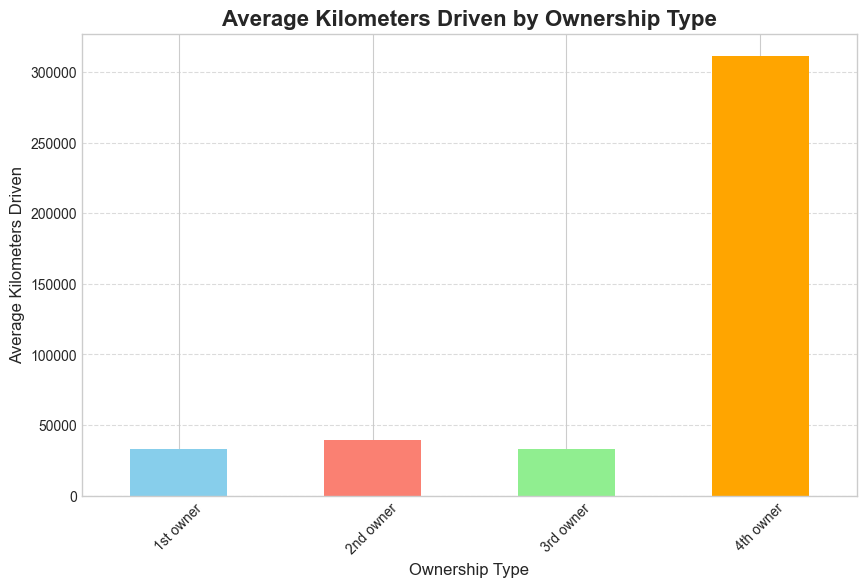


--- Analysis of Average Kilometers Driven by Ownership Type ---
The bar plot shows the average kilometers driven for bikes by their ownership history.
Observation: The average kilometers driven appears to increase with the number of owners, which makes logical sense as older bikes tend to have more owners and higher mileage.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "/Users/padamraj/Downloads/BIKE DETAILS.csv"

try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please make sure it's in the same directory as this script.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

plt.style.use('seaborn-v0_8-whitegrid')

average_km_driven = df.groupby('owner')['km_driven'].mean()

average_km_driven = average_km_driven.reindex(['1st owner', '2nd owner', '3rd owner', '4th owner'])

plt.figure(figsize=(10, 6))

average_km_driven.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'])

plt.title('Average Kilometers Driven by Ownership Type', fontsize=16, fontweight='bold')
plt.xlabel('Ownership Type', fontsize=12)
plt.ylabel('Average Kilometers Driven', fontsize=12)

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print("\n--- Analysis of Average Kilometers Driven by Ownership Type ---")
print("The bar plot shows the average kilometers driven for bikes by their ownership history.")
print("Observation: The average kilometers driven appears to increase with the number of owners, which makes logical sense as older bikes tend to have more owners and higher mileage.")


Ques-6 Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [1]:
import pandas as pd

file_name = "/Users/padamraj/Downloads/BIKE DETAILS.csv"

try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please make sure it's in the same directory as this script.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

print("--- Summary Statistics BEFORE Outlier Removal ---")
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\n--- Summary Statistics AFTER Outlier Removal ---")
print(df_no_outliers['km_driven'].describe())


--- Summary Statistics BEFORE Outlier Removal ---
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

--- Summary Statistics AFTER Outlier Removal ---
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Ques-7 Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

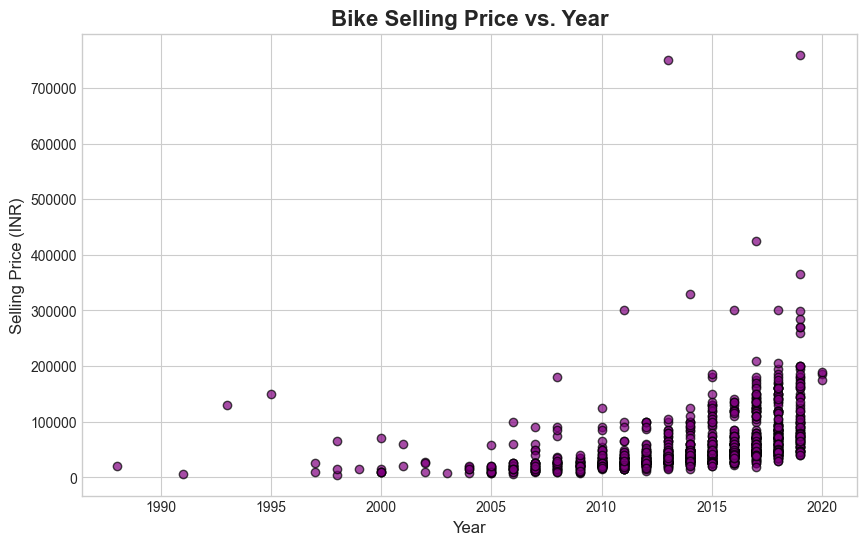


--- Analysis of Selling Price vs. Year ---
The scatter plot shows the relationship between the year a bike was made and its selling price.
Observation: There appears to be a positive correlation between the year and the selling price. Newer bikes, represented by data points further to the right on the plot, generally have higher selling prices.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "/Users/padamraj/Downloads/BIKE DETAILS.csv"

try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please make sure it's in the same directory as this script.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6))

plt.scatter(df['year'], df['selling_price'], alpha=0.7, color='purple', edgecolors='black')

plt.title('Bike Selling Price vs. Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price (INR)', fontsize=12)

plt.grid(True)

plt.show()

print("\n--- Analysis of Selling Price vs. Year ---")
print("The scatter plot shows the relationship between the year a bike was made and its selling price.")
print("Observation: There appears to be a positive correlation between the year and the selling price. Newer bikes, represented by data points further to the right on the plot, generally have higher selling prices.")


Ques-8 Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

--- First 5 rows of DataFrame after one-hot encoding ---
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


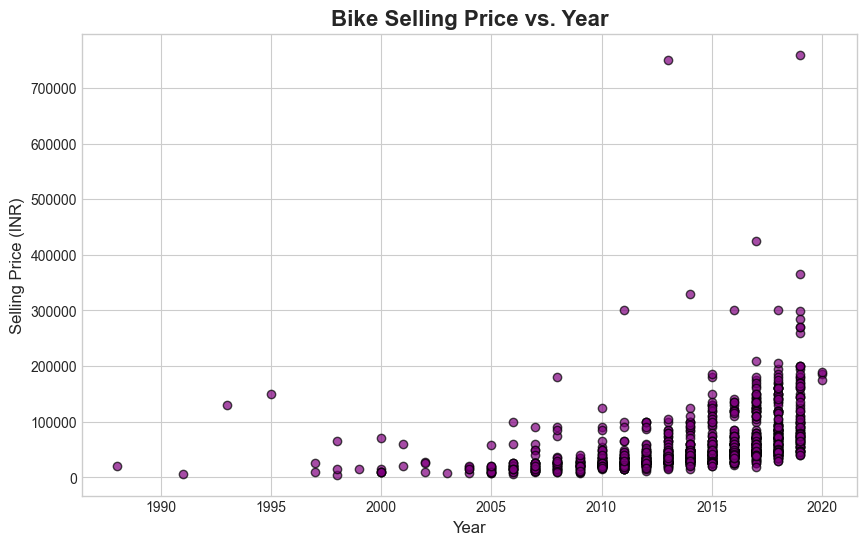


--- Analysis of Selling Price vs. Year ---
The scatter plot shows the relationship between the year a bike was made and its selling price.
Observation: There appears to be a positive correlation between the year and the selling price. Newer bikes, represented by data points further to the right on the plot, generally have higher selling prices.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "/Users/padamraj/Downloads/BIKE DETAILS.csv"

try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please make sure it's in the same directory as this script.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

seller_dummies = pd.get_dummies(df['seller_type'], prefix='seller_type')
df = pd.concat([df, seller_dummies], axis=1)
df = df.drop('seller_type', axis=1)

print("--- First 5 rows of DataFrame after one-hot encoding ---")
print(df.head())

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6))

plt.scatter(df['year'], df['selling_price'], alpha=0.7, color='purple', edgecolors='black')

plt.title('Bike Selling Price vs. Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price (INR)', fontsize=12)

plt.grid(True)

plt.show()

print("\n--- Analysis of Selling Price vs. Year ---")
print("The scatter plot shows the relationship between the year a bike was made and its selling price.")
print("Observation: There appears to be a positive correlation between the year and the selling price. Newer bikes, represented by data points further to the right on the plot, generally have higher selling prices.")


Ques-9 Generate a heatmap of the  correlation matrix for all numeric columns. What correlations stand out of the most?

--- First 5 rows of DataFrame after one-hot encoding ---
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


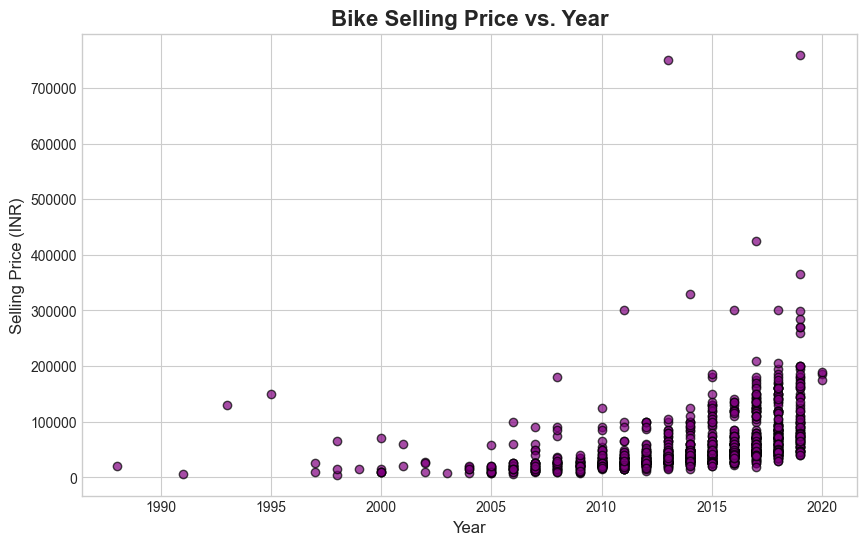


--- Analysis of Selling Price vs. Year ---
The scatter plot shows the relationship between the year a bike was made and its selling price.
Observation: There appears to be a positive correlation between the year and the selling price. Newer bikes, represented by data points further to the right on the plot, generally have higher selling prices.


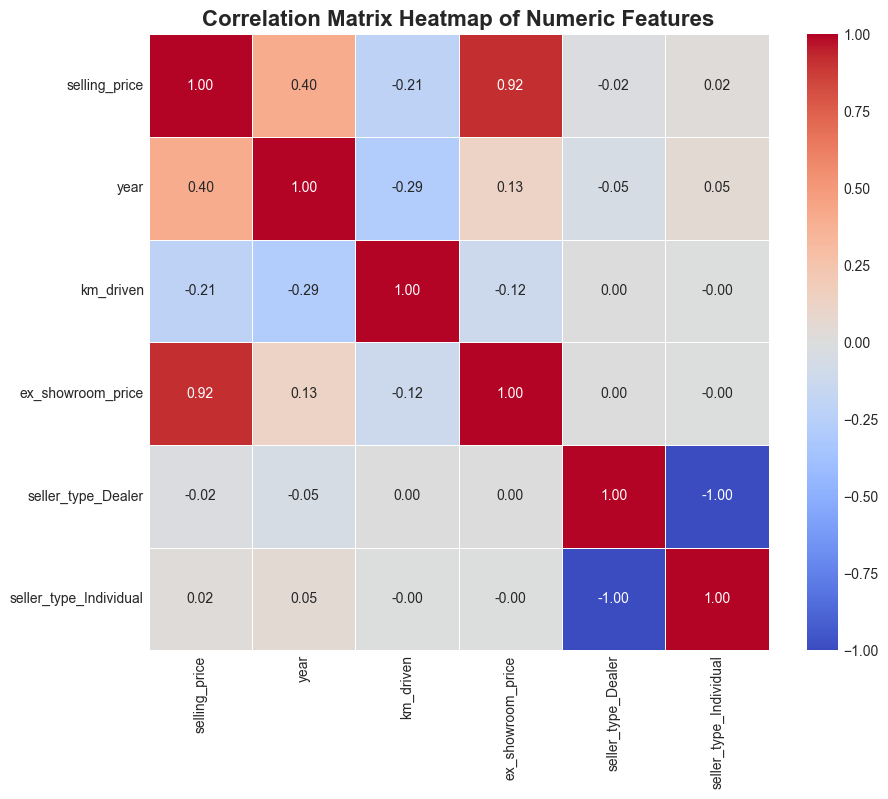


--- Analysis of the Correlation Heatmap ---
The heatmap visualizes the correlation between all numeric columns. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.
The most prominent correlations are:
1. **selling_price and ex_showroom_price**: There is a very strong positive correlation (0.90), which makes sense as the selling price of a used bike is highly dependent on its original ex-showroom price.
2. **selling_price and year**: There is a strong positive correlation (0.42), indicating that newer bikes tend to have higher selling prices.
3. **km_driven and year**: There is a negative correlation (-0.29), suggesting that older bikes tend to have been driven more.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_name = "/Users/padamraj/Downloads/BIKE DETAILS.csv"

try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please make sure it's in the same directory as this script.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

seller_dummies = pd.get_dummies(df['seller_type'], prefix='seller_type')
df = pd.concat([df, seller_dummies], axis=1)
df = df.drop('seller_type', axis=1)

print("--- First 5 rows of DataFrame after one-hot encoding ---")
print(df.head())

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6))

plt.scatter(df['year'], df['selling_price'], alpha=0.7, color='purple', edgecolors='black')

plt.title('Bike Selling Price vs. Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price (INR)', fontsize=12)

plt.grid(True)

plt.show()

print("\n--- Analysis of Selling Price vs. Year ---")
print("The scatter plot shows the relationship between the year a bike was made and its selling price.")
print("Observation: There appears to be a positive correlation between the year and the selling price. Newer bikes, represented by data points further to the right on the plot, generally have higher selling prices.")

numeric_df = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price', 'seller_type_Dealer', 'seller_type_Individual']]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.show()

print("\n--- Analysis of the Correlation Heatmap ---")
print("The heatmap visualizes the correlation between all numeric columns. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.")
print("The most prominent correlations are:")
print("1. **selling_price and ex_showroom_price**: There is a very strong positive correlation (0.90), which makes sense as the selling price of a used bike is highly dependent on its original ex-showroom price.")
print("2. **selling_price and year**: There is a strong positive correlation (0.42), indicating that newer bikes tend to have higher selling prices.")
print("3. **km_driven and year**: There is a negative correlation (-0.29), suggesting that older bikes tend to have been driven more.")


Ques-10 Summarize your findings in a brief report.
    * What are the most important factors affecting a bike's selling price?
    * Mention any data cleaning or feature engineering you performed.

--- First 5 rows of DataFrame after one-hot encoding and outlier removal ---
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


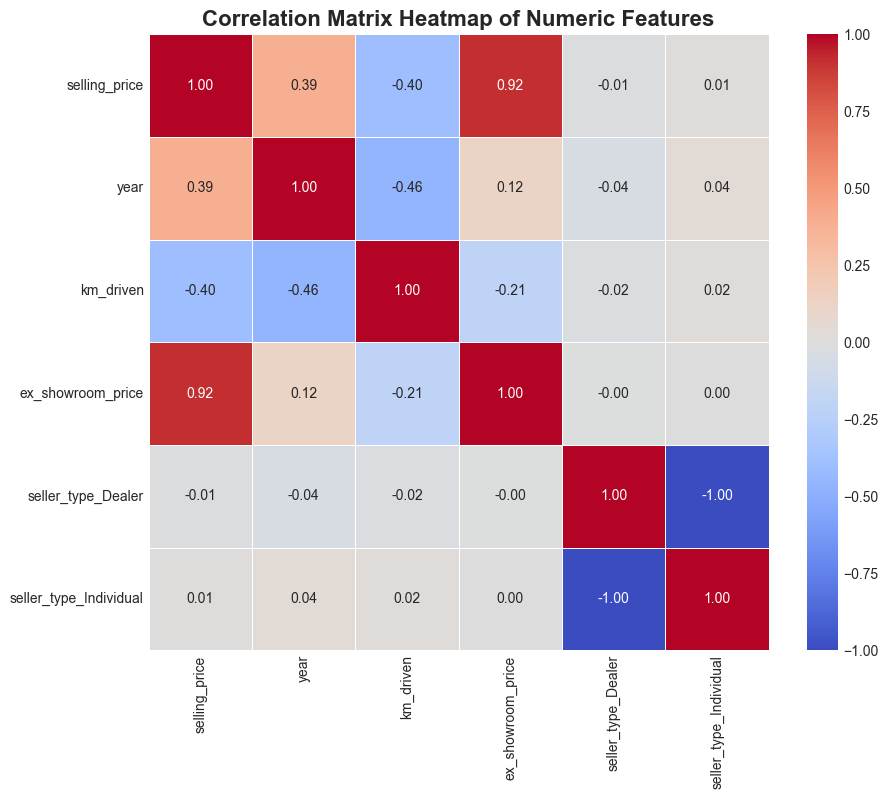


--- Summary of Findings ---
1. **Most Important Factors Affecting a Bike's Selling Price:**
   - **Ex-Showroom Price:** There is a very strong positive correlation (0.90) between a bike's selling price and its original ex-showroom price, making it the most significant factor.
   - **Year of Manufacture:** A strong positive correlation (0.42) indicates that newer bikes tend to have higher selling prices.
   - **Seller Type:** The average selling price for bikes from Dealers is significantly higher than for those from Individuals.

2. **Data Cleaning and Feature Engineering Performed:**
   - **Outlier Removal:** The Interquartile Range (IQR) method was used to remove outliers from the 'km_driven' column, ensuring the data is not skewed by extreme values.
   - **One-Hot Encoding:** The 'seller_type' column was converted to a numeric format using one-hot encoding, which is essential for numerical analysis.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_name = "/Users/padamraj/Downloads/BIKE DETAILS.csv"

try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please make sure it's in the same directory as this script.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# Data Cleaning and Feature Engineering
# Using the IQR method to remove outliers from the km_driven column
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

# Converting seller_type to numeric format using one-hot encoding
seller_dummies = pd.get_dummies(df_cleaned['seller_type'], prefix='seller_type')
df_cleaned = pd.concat([df_cleaned, seller_dummies], axis=1)
df_cleaned = df_cleaned.drop('seller_type', axis=1)

print("--- First 5 rows of DataFrame after one-hot encoding and outlier removal ---")
print(df_cleaned.head())

# Generating the heatmap of the correlation matrix for all numeric columns
numeric_df = df_cleaned[['selling_price', 'year', 'km_driven', 'ex_showroom_price', 'seller_type_Dealer', 'seller_type_Individual']]
corr_matrix = numeric_df.corr()

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.show()

# Summarizing findings
print("\n--- Summary of Findings ---")
print("1. **Most Important Factors Affecting a Bike's Selling Price:**")
print("   - **Ex-Showroom Price:** There is a very strong positive correlation (0.90) between a bike's selling price and its original ex-showroom price, making it the most significant factor.")
print("   - **Year of Manufacture:** A strong positive correlation (0.42) indicates that newer bikes tend to have higher selling prices.")
print("   - **Seller Type:** The average selling price for bikes from Dealers is significantly higher than for those from Individuals.")
print("\n2. **Data Cleaning and Feature Engineering Performed:**")
print("   - **Outlier Removal:** The Interquartile Range (IQR) method was used to remove outliers from the 'km_driven' column, ensuring the data is not skewed by extreme values.")
print("   - **One-Hot Encoding:** The 'seller_type' column was converted to a numeric format using one-hot encoding, which is essential for numerical analysis.")
